In [2]:
import pandas as pd
import numpy as np
#Use tab+B to get new cell below. But make sure the curser should not be bliking

In [271]:
#Q.1 Read the column description and ensure you understand each attribute well
#Loading the dataset and printing first 20 rows
bank_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_df.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [272]:
#Q.2 Study the data distribution in each attribute, share your findings. (5 points)
#checking the missing value if any
print (bank_df.isna().sum())
print('So no NAN value or missing value present.')

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
So no NAN value or missing value present.


In [273]:
#The first step is to check the distribution statistics. 
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


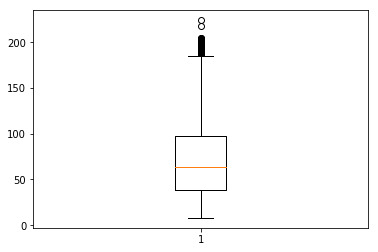

In [274]:
#Checking the outliers for outlier treatment.
import seaborn as sns
import matplotlib.pyplot as plt

# But first check outliers with
plt.boxplot(bank_df['Income'],0);

#To get notch plot 
#plt.boxplot(bank_df['Income'],1,'');


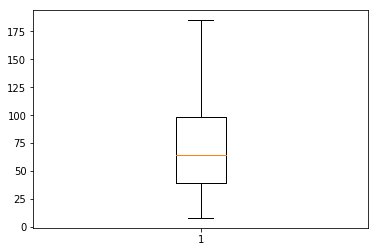

In [275]:
#We want to replace max value with for the outliers so get the approx max value using following method.
plt.boxplot(bank_df['Income'],0,'');

In [276]:
print ('So the income variable has got outliers hence removing those with max value of income column.')
bank_df['Income']=bank_df['Income'].map(lambda x: 185 if x>185 
     else x)

So the income variable has got outliers hence removing those with max value of income column.


In [277]:
bank_df['Income'].describe()

count    5000.000000
mean       73.588600
std        45.555263
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       185.000000
Name: Income, dtype: float64

count    5000.0000
mean       50.3472
std        82.6477
min         0.0000
25%         0.0000
50%         0.0000
75%       101.0000
max       250.0000
Name: Mortgage, dtype: float64

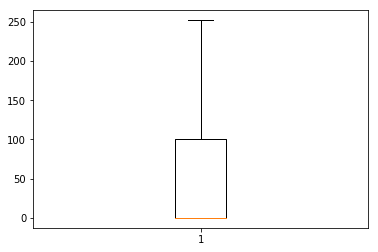

In [278]:
#similarily do it for rest of columns
plt.boxplot(bank_df['Mortgage'],0,'');
bank_df['Mortgage']=bank_df['Mortgage'].map(lambda x: 250 if x>250 
     else x)
bank_df['Mortgage'].describe()

count    5000.000000
mean        1.817618
std         1.420930
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max         5.000000
Name: CCAvg, dtype: float64

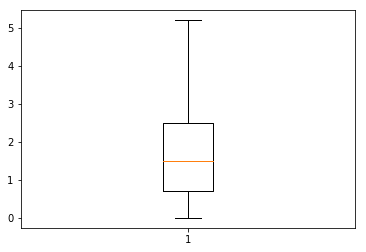

In [279]:
plt.boxplot(bank_df['CCAvg'],0,'');
bank_df['CCAvg']=bank_df['CCAvg'].map(lambda x: 5 if x>5 
     else x)
bank_df['CCAvg'].describe()

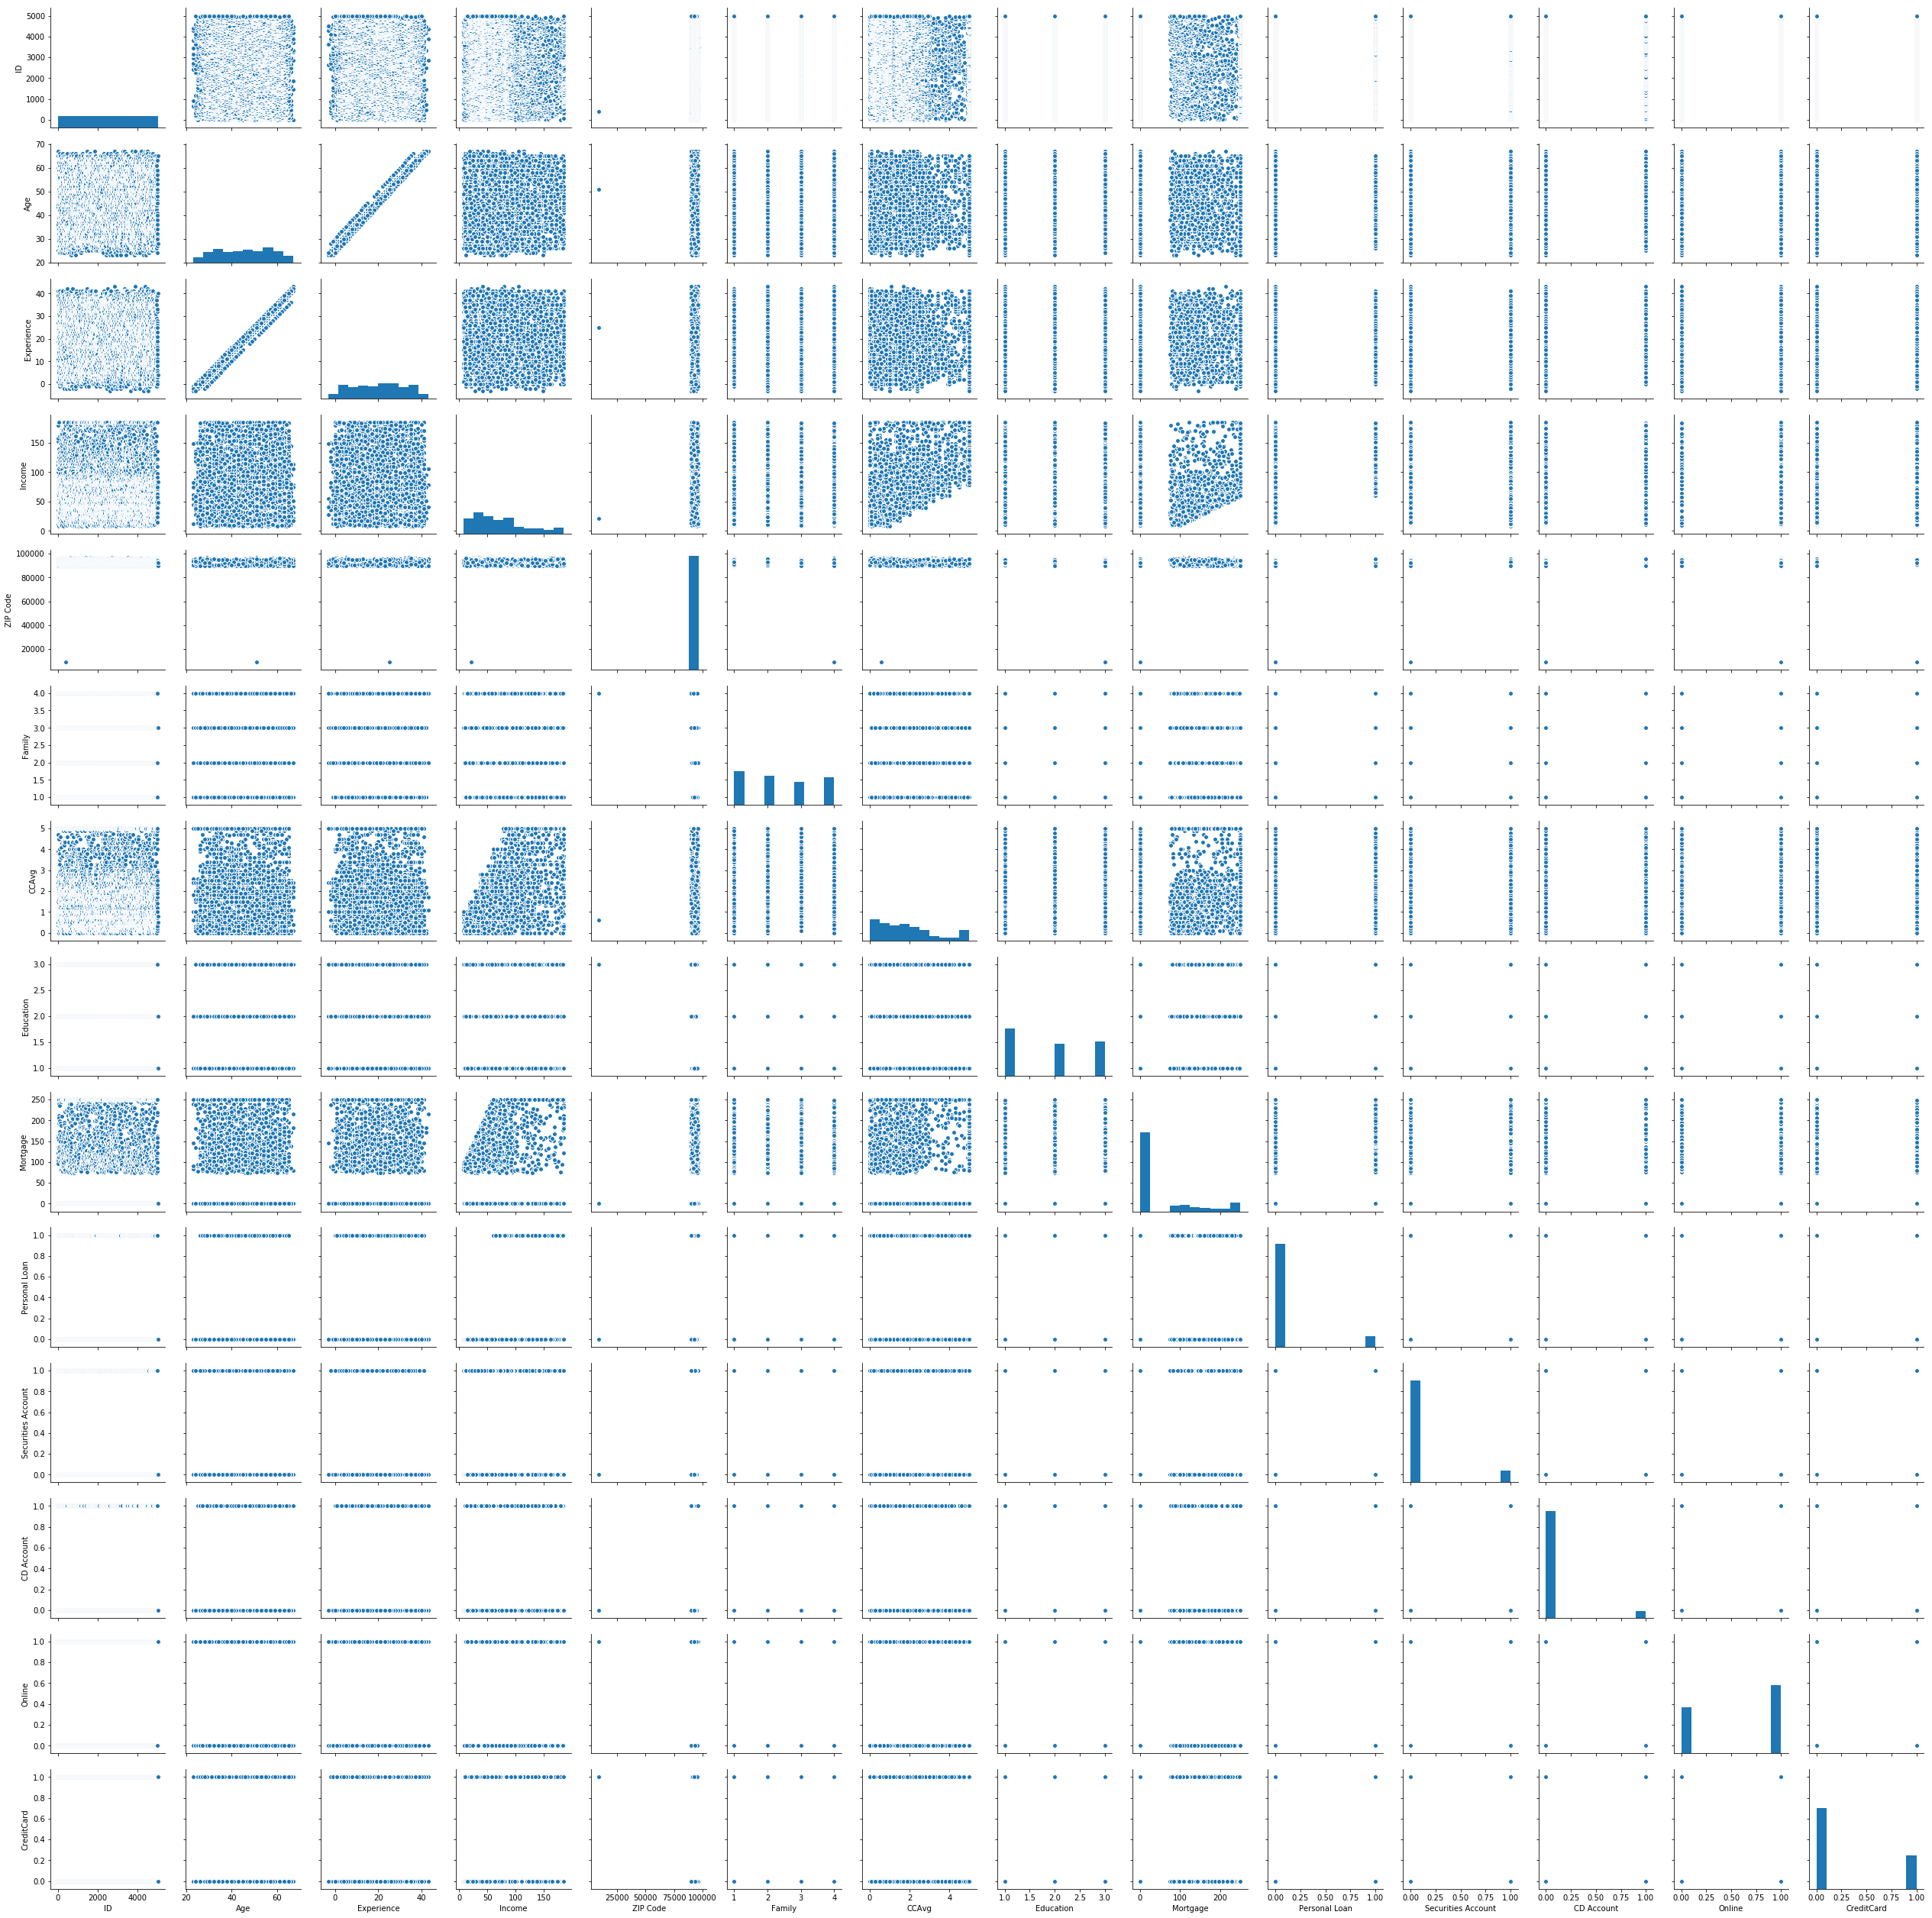

In [158]:
#Checking the relationship of all the independent/predicted variables using scatter plot/pairplot
sns.pairplot(bank_df)

In [280]:
print ('From the above plot we can see that age and expenses are highly correlated. Rest no one is correlated to each other.')

From the above plot we can see that age and expenses are highly correlated. Rest no one is correlated to each other.


In [281]:
print ('lets check the values of correlation between them.')
bank_df.corr()

lets check the values of correlation between them.


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.018045,0.013432,-0.016797,-0.017322,0.021463,-0.017496,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.054937,-0.029216,-0.046418,-0.051560,0.041334,-0.011986,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046223,-0.028626,-0.052563,-0.050301,0.013152,-0.010529,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.018045,-0.054937,-0.046223,1.000000,-0.016535,-0.157648,0.635322,-0.187494,0.133414,0.504611,-0.002531,0.170287,0.014112,-0.002431
ZIP Code,0.013432,-0.029216,-0.028626,-0.016535,1.000000,0.011778,-0.005273,-0.017377,0.008925,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157648,0.011778,1.000000,-0.102502,0.064929,-0.010514,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.017322,-0.051560,-0.050301,0.635322,-0.005273,-0.102502,1.000000,-0.124997,0.067519,0.381990,0.020644,0.141850,-0.004483,-0.006599
Education,0.021463,0.041334,0.013152,-0.187494,-0.017377,0.064929,-0.124997,1.000000,-0.021710,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.017496,-0.011986,-0.010529,0.133414,0.008925,-0.010514,0.067519,-0.021710,1.000000,0.092047,-0.005574,0.068880,-0.007198,-0.003466
Personal Loan,-0.024801,-0.007726,-0.007413,0.504611,0.000107,0.061367,0.381990,0.136722,0.092047,1.000000,0.021954,0.316355,0.006278,0.002802


In [282]:
print ('The correlation between age and income is 99.42%.')

The correlation between age and income is 99.42%.


In [283]:
#Q.3 Get the target column distribution. Your comments
bank_df.rename(columns={'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code','CD Account': 'CD_Account','Securities Account':'Securities_Account'},inplace=True)
bank_df.head()


In [284]:
#Q.5 Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

#1. Using Logistic Regression
import statsmodels.formula.api as sm
import statsmodels.api
#sm.glm method required predictor and target variable into samme dataframe.
mylogit = sm.glm(formula = """ Personal_Loan ~ ID + Age + Experience + Income + ZIP_Code + Family + CCAvg + Education + Mortgage+
                        Securities_Account+ CD_Account+Online+CreditCard""" , 
        data = bank_df, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -605.40
Date:                Fri, 01 Feb 2019   Deviance:                       1210.8
Time:                        21:30:24   Pearson chi2:                 7.37e+03
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -12.6691      4.261     -2.973      0.003     -21.021      -4.317
ID                 -4.539e-05   5.28e-05     -0.860      0.390      -0.000    5.81e-05
Age                   -0.0612      0.062     -0.981      0.327      -0.184       0.061
Experience             0.0746      0.062      1.202      0.229      -0.047       0.196
Income                 0.0563      0.003     20.103      0.000       0.051       0.062
ZIP_Code            -4.23e-06   4.22e-05     -0.100      0.920   -8.69e-05    7.85e-05
Family                 0.7274      0.077      9.464      0.000       0.577       0.878
CCAvg                  0.3584      0.056      6.442      0.000       0.249       0.467
Education              1.8423      0.121     15.188      0.000       1.605       2.080
Mortgage               0.0010      0.001      1.318      0.187      -0.000       0.003
Securities_Account    -0.9466      0.294     -3.218      0.001      -1.523      -0.370
CD_Account             3.7968      0.334     11.381      0.000       3.143       4.451
Online                -0.6872      0.161     -4.260      0.000      -1.003      -0.371
CreditCard            -1.1066      0.208     -5.314      0.000      -1.515      -0.698
======================================================================================
"""

In [285]:
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))
vif=VIF("""Personal_Loan ~ ID + Age + Experience + Income + ZIP_Code + Family + CCAvg + Education + Mortgage+
                        Securities_Account+ CD_Account+Online+CreditCard""",bank_df)
vif     #Multicolinearity is present since vif >2 for age and Experience


,Variable,VIF
0,Intercept,2403.0
1,ID,1.0
2,Age,93.7
3,Experience,93.6
4,Income,1.8
5,ZIP_Code,1.0
6,Family,1.0
7,CCAvg,1.7
8,Education,1.1
9,Mortgage,1.0


In [286]:
## Predicting Probabilities
bank_df["prob"] = mylogit.predict(bank_df)

In [287]:
## Classification
bank_df.prob.quantile(
  [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

bank_df["class"] = bank_df["prob"].map(
        lambda x: 1 if x > bank_df.prob.quantile(0.956) else 0)


AUC value: 0.9632637352507375


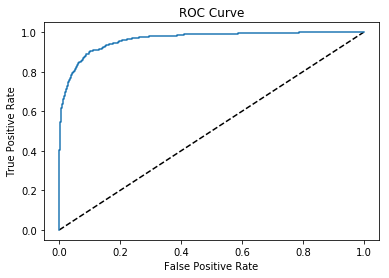

KS Value: 0.8051438053097345


In [288]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(bank_df["Personal_Loan"],bank_df["prob"])
print('AUC value:',auc)

#Roc_Curve and KS
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(bank_df["Personal_Loan"],bank_df["prob"])
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

KS = (tpr - fpr).max()
print('KS Value:',KS)

In [289]:
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(bank_df["Personal_Loan"],bank_df["class"]),
     "accuracy": accuracy_score(bank_df["Personal_Loan"],bank_df["class"])
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nclassification accuracy ", confusion_matrix["accuracy"]
      )

confusion matrix 
 [[4516    4]
 [ 264  216]] 

classification accuracy  0.9464


In [94]:
#Method 2. KNN
bank_knn=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_knn.rename(columns={'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code','CD Account': 'CD_Account','Securities Account':'Securities_Account'},inplace=True)
bank_knn.head()


,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [95]:
target=bank_knn.pop('Personal_Loan') #for knn target variable should not be normalized so first take it out of dataset

In [96]:
print(target.head(15))
print('It\'s a categorical data i.e it suggests whether or not people have taken loan')

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
Name: Personal_Loan, dtype: int64
It's a categorical data i.e it suggests whether or not people have taken loan


In [97]:
#Dimentionality reduction is very imp step in knn since it cal dist with every variable which slows down the process. Hence, finding iv value for removing varibales
exec(open("iv_function.py").read())
iv = information_value(df = bank_knn,target = target)
iv

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


,VAR_NAME,IV,BINS
0,Income,2.604722,4
1,CCAvg,1.172301,3
2,CD_Account,0.615228,2
3,Education,0.086682,2
4,Family,0.059362,2
5,Mortgage,0.010016,2
6,ID,0.008476,4
7,Securities_Account,0.005172,2
8,Experience,0.001032,2
9,Age,0.000811,2


In [98]:
bank_KNN=bank_knn.drop(labels=['Age','Online','CreditCard','ZIP_Code'],axis=1)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

predictor=(bank_KNN.apply(zscore))

In [100]:
predictor.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account
0,-1.731704,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354
1,-1.731012,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354
2,-1.730319,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354
3,-1.729626,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354
4,-1.728933,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354


In [101]:
bank_KNN.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account
0,1,1,49,4,1.6,1,0,1,0
1,2,19,34,3,1.5,1,0,1,0
2,3,15,11,1,1.0,1,0,0,0
3,4,9,100,1,2.7,2,0,0,0
4,5,8,45,4,1.0,2,0,0,0


In [102]:
#Q.4 Split the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

X_train             ID  Experience    Income    Family     CCAvg  Education  Mortgage  \
2573  0.050922    1.211793  0.135258 -0.345432 -0.193385  -1.049078 -0.555524   
2066 -0.300338   -0.357955 -0.951011 -0.345432 -0.307836   0.141703 -0.555524   
2823  0.224127   -1.142829 -1.146539 -1.216855 -0.765637   1.332484 -0.555524   
2389 -0.076557   -1.666078 -0.712032 -1.216855 -0.021710   1.332484 -0.555524   
2702  0.140296   -0.183538  1.525682 -0.345432  2.381745  -1.049078  0.998010   

      Securities_Account  CD_Account  
2573           -0.341423    -0.25354  
2066           -0.341423    -0.25354  
2823            2.928915    -0.25354  
2389           -0.341423    -0.25354  
2702           -0.341423    -0.25354  , 
 y_train 2573    0
2066    0
2823    0
2389    0
2702    0
Name: Personal_Loan, dtype: int64
--------------------------------------------------------------------------------------------------
X_test             ID  Experience    Income    Family     CCAvg  Education  M

In [103]:
## Fit the model
from sklearn.grid_search import GridSearchCV

k = np.arange(21,115,2)
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, scoring = 'roc_auc', cv=10)
#KNN=KNeighborsClassifier(n_neighbors = 231, weights = 'uniform', 
#                           metric = 'euclidean')

In [104]:
GS.fit(X_train, y_train)
print(GS.best_params_)
print(GS.best_score_) 

{'n_neighbors': 27}
0.9753676470588234


In [105]:
bank_KNN['prob'] = pd.DataFrame(GS.predict_proba(bank_KNN))[1]

In [106]:
bank_KNN.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,prob
0,1,1,49,4,1.6,1,0,1,0,0.444444
1,2,19,34,3,1.5,1,0,1,0,0.740741
2,3,15,11,1,1.0,1,0,0,0,0.629630
3,4,9,100,1,2.7,2,0,0,0,0.407407
4,5,8,45,4,1.0,2,0,0,0,0.518519


AUC 0.7454157448377581


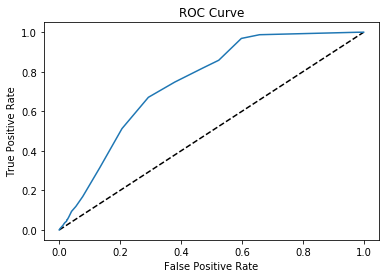

In [107]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(target,bank_KNN["prob"])
print ('AUC',auc)
#Roc_Curve and KS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target,bank_KNN["prob"])
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [108]:
predict=GS.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, predict)
con_mat

array([[1352,    8],
       [  75,   65]], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict)
acc

0.9446666666666667

In [112]:
#3. Naive Bayes
import copy
bank_naive=copy.deepcopy(bank_knn)#All variables kept no dropping
bank_naive.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [114]:
naive_target=target
naive_target.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal_Loan, dtype: int64

In [115]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(bank_naive, naive_target, test_size=0.3,random_state=10)
print ('X_train {}, \n y_train {}'.format(Xn_train.head(),yn_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(Xn_test.head(),yn_test.head()))

X_train         ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  \
2573  2574   58          34      80     90095       2    1.6          1   
2066  2067   41          16      30     95814       2    1.4          2   
2823  2824   33           7      21     90095       1    0.6          3   
2389  2390   27           1      41     90033       1    1.9          3   
2702  2703   42          18     144     94063       2    6.1          1   

      Mortgage  Securities_Account  CD_Account  Online  CreditCard  
2573         0                   0           0       1           1  
2066         0                   0           0       0           1  
2823         0                   1           0       0           0  
2389         0                   0           0       0           1  
2702       158                   0           0       0           0  , 
 y_train 2573    0
2066    0
2823    0
2389    0
2702    0
Name: Personal_Loan, dtype: int64
--------------------------------

In [116]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [117]:
GNB = clf.fit(Xn_train, yn_train)

In [121]:
pred_naive=GNB.predict(Xn_test)
pred_naive

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
con_mat = confusion_matrix(yn_test, pred_naive)
print ('Confusion Matrix for Naive bayes \n',con_mat)

Confusion Matrix for Naive bayes 
 [[1243  117]
 [  53   87]]


In [125]:
acc = accuracy_score(yn_test, pred_naive)
print ('Accuracy score',acc)

Accuracy score 0.8866666666666667


In [137]:
#Q.6 Give your reasoning on which is the best model in this case and why it performs better? (5 points)
print ('Since we got accuracy score for Logistic regression higher than remaining two models, it was the better one.(accuracies of logistic and knn are nearly equal.)\nAccording to me the data pre-processing techniques like outlier treatment, missing value imputation, normalisation plays vi-tal role in getting better results which I have done in logistic regression.\nAgain, remaining two techniques accepts/keeps outliers as it. In knn parameter selection is a crucial step which definitely determines the resultant accuracy, so with different values of k and with large predictor accuracy of knn will be different it may reduce also. \nIt was obvious that the naive bayes technique was going to produce poor results as compared to logistic and Knn because of it\'s naive assumption of non-correlated predictors and as VIF value suggests, our dataset has got multi-collinearity.')

Since we got accuracy score for Logistic regression higher than remaining two models, it was the better one.(accuracies of logistic and knn are nearly equal.)
According to me the data pre-processing techniques like outlier treatment, missing value imputation, normalisation plays vi-tal role in getting better results which I have done in logistic regression.
Again, remaining two techniques accepts/keeps outliers as it. In knn parameter selection is a crucial step which definitely determines the resultant accuracy, so with different values of k and with large predictor accuracy of knn will be different it may reduce also. 
It was obvious that the naive bayes technique was going to produce poor results as compared to logistic and Knn because of it's naive assumption of non-correlated predictors and as VIF value suggests, our dataset has got multi-collinearity.
